# Visualizing Categorical Data

## Import Libraries

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read the data

In [98]:
data_frame = pd.read_csv("CategoricalData.csv")

In [99]:
data_frame

,Unnamed: 0,Frequency
0,Audi,124
1,BMW,98
2,Mercedes,113


## Add index

In [100]:
data_frame.columns = ['Brand', 'Frequency']

In [101]:
data_frame

,Brand,Frequency
0,Audi,124
1,BMW,98
2,Mercedes,113


## Count (Bar) Plot

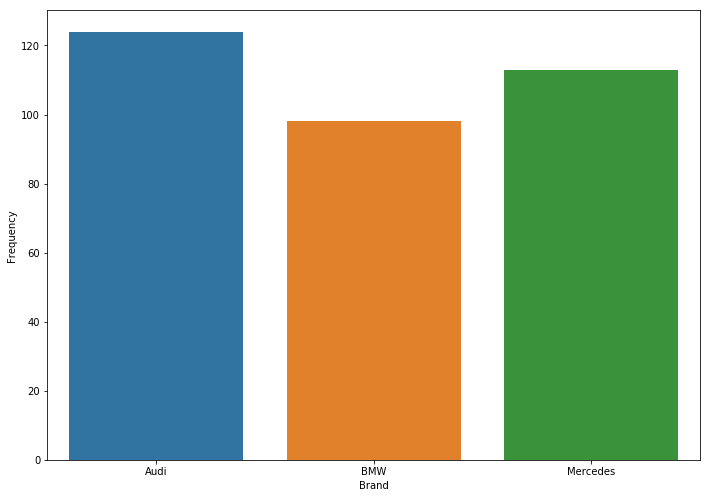

In [102]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

ax = sns.barplot(x="Brand", y="Frequency", data=data_frame)

## Pie Chart

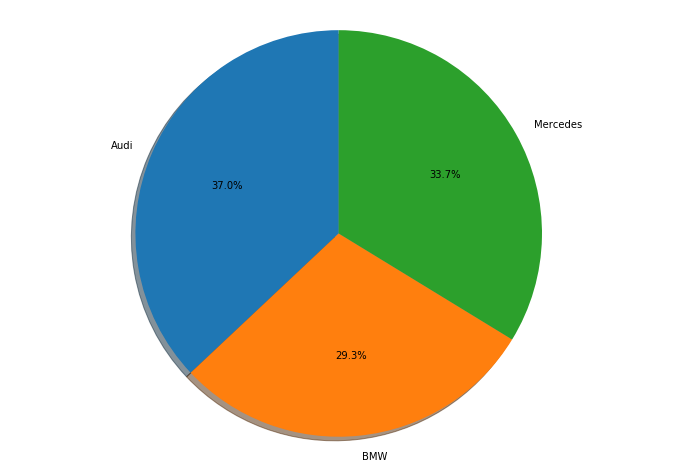

In [103]:
fig1, ax1 = plt.subplots()
ax1.pie(data_frame['Frequency'], labels=data_frame['Brand'], autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1.set_size_inches(11.7, 8.27)

## Create a Pareto Diagram

### Sort the data

In [105]:
data_frame.sort_values(by='Frequency', ascending=False, inplace=True)

In [106]:
data_frame

,Brand,Frequency
0,Audi,124
2,Mercedes,113
1,BMW,98


### Calculate relative frequency

In [107]:
data_frame['Relative Frequency'] = data_frame['Frequency'] 

In [108]:
data_frame['Relative Frequency'] = data_frame['Relative Frequency'].apply(lambda x: (x/data_frame['Frequency'].sum())*100)

In [109]:
data_frame

,Brand,Frequency,Relative Frequency
0,Audi,124,37.014925
2,Mercedes,113,33.731343
1,BMW,98,29.253731


### Calculate Cumulative Frequency

In [113]:
data_frame['Cumulative Frequency'] = data_frame['Relative Frequency'].cumsum()

In [114]:
data_frame

,Brand,Frequency,Relative Frequency,Cumulative Frequency
0,Audi,124,37.014925,37.014925
2,Mercedes,113,33.731343,70.746269
1,BMW,98,29.253731,100.000000


In [115]:
data_frame.reset_index(inplace=True)

In [116]:
data_frame

,index,Brand,Frequency,Relative Frequency,Cumulative Frequency
0,0,Audi,124,37.014925,37.014925
1,2,Mercedes,113,33.731343,70.746269
2,1,BMW,98,29.253731,100.000000


In [117]:
data_frame.drop('index', axis=1, inplace=True)

In [118]:
data_frame

,Brand,Frequency,Relative Frequency,Cumulative Frequency
0,Audi,124,37.014925,37.014925
1,Mercedes,113,33.731343,70.746269
2,BMW,98,29.253731,100.000000


Pareto chart is also avalable as a library

https://github.com/tisimst/paretochart

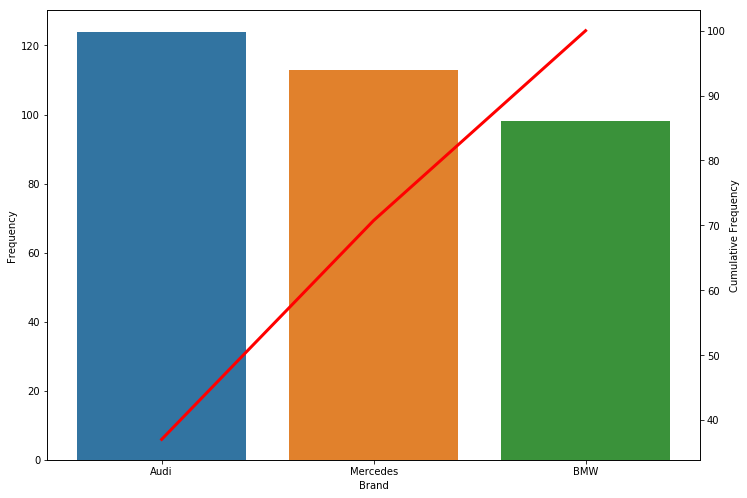

In [119]:
fig, ax1 = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

ax1 = sns.barplot(x="Brand", y="Frequency", data=data_frame)

ax2 = ax1.twinx()
ax2 = sns.lineplot(x=data_frame.index, y="Cumulative Frequency", data=data_frame, markers=True, color='r', lw=3)